In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
os.chdir('c:/users/hp/desktop/tutorial/kaim-week-2')
sys.path.append(os.getcwd())
print(os.getcwd())
from scripts.data_preparation import data_extraction,get_missing_data_percentage,data_cleaning,identify_outliers
from scripts.aggregation import data_aggregation,segment_data





c:\users\hp\desktop\tutorial\kaim-week-2


In [5]:
path='data/Copy of Week2_challenge_data_source(CSV).csv'
data= data_extraction(path)
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


Comparing Data before and after it was cleaned!

In [6]:

missing_data=get_missing_data_percentage(data)#calling get_missing_data_percentage function
print(missing_data)


Bearer Id                                    0.660662
Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Last Location Name                           0.768662
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%

After cleaning the data


In [8]:
count_percent = get_missing_data_percentage(data)#calling get_missing_data_percentage function  
    #so here we are calculating the mode of the data since we have calculated the number of missing data
if (count_percent>50).any():#if the misssing data of the column is more than 50% drop the column
        data=data.drop(columns=count_percent[count_percent>50].index)
else:#if the missing data is less than 50% impute the missing data with the mode of the data
    for column in data.columns:
        if data[column].dtype=='object':
            data[column]=data[column].fillna(data[column].mode()[0])#we use [0] because there may me more than one mode
        elif data[column].dtype=='int64' or data[column].dtype=='float64':
            data[column]=data[column].fillna(data[column].mean())
count_2=data.isnull().sum()
print('Cleaned data\n', count_2)


Cleaned data
 Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with

Next we identify the outliers in the data


In [9]:
modified_data=identify_outliers(data)
print('data before removing outliers', data.head())







data before removing outliers       Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          202

In [10]:
print('data after removing outliers')
modified_data.head()

data after removing outliers


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,104608.560347,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,104608.560347,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,104608.560347,2.082016e+14,4.188282e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,104608.560347,2.082014e+14,4.188282e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,104608.560347,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


Now that we have our datas cleaned we can work on aggregating them

Here we will aggregate - the number of XDR sessions, session duration, total download and upload data, and total data Volume

In [11]:
data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',


In [12]:
from scripts.aggregation import data_aggregation
data=modified_data
aggregated_data = data_aggregation(data)#sorted by IMSI as the index of the data
aggregated_data.head(30)

,IMSI,number_of_sessions,session_duration,total_youtube_dl,total_youtube_ul,total_social_media_dl,total_social_media_ul,total_gaming_dl,total_gaming_ul,total_email_dl,total_email_ul,total_google_dl,total_google_ul,total_other_dl,total_other_ul,total_download,total_upload,total_data_volume
0,2.082009e+14,2,251915.000000,26495102.0,26317816.0,4045932.0,40466.0,1.507456e+09,24271541.0,4597279.0,635340.0,17060742.0,5250079.0,7.792969e+08,17253985.0,2.338952e+09,73769227.0,2.412721e+09
1,2.082009e+14,2,126297.000000,16428236.0,32329524.0,3491512.0,48319.0,1.239464e+09,24660037.0,1433083.0,429463.0,15604110.0,3563841.0,9.769953e+08,1895104.0,2.253416e+09,62926288.0,2.316342e+09
2,2.082009e+14,1,55877.000000,13577620.0,5764194.0,630867.0,40396.0,2.907879e+07,16446349.0,2503713.0,244675.0,7190690.0,1389997.0,4.350768e+08,3860503.0,4.880584e+08,27746114.0,5.158046e+08
3,2.082009e+14,1,61019.000000,11114660.0,9366339.0,205018.0,33838.0,4.878149e+08,13393506.0,3555153.0,366043.0,11372863.0,3503395.0,3.898900e+07,4242954.0,5.530516e+08,30906075.0,5.839577e+08
4,2.082009e+14,1,86351.000000,5881602.0,5235003.0,2486030.0,45231.0,5.400481e+08,6652623.0,1843308.0,668941.0,6150936.0,105809.0,2.492171e+08,8477545.0,8.056270e+08,21185152.0,8.268122e+08
5,2.082009e+14,1,32817.000000,17102595.0,17808039.0,1302453.0,20106.0,8.779545e+07,13417222.0,1696544.0,506696.0,1233766.0,3136707.0,3.684439e+08,14704129.0,4.775747e+08,49592899.0,5.271676e+08
6,2.082009e+14,1,61213.000000,10209920.0,1284907.0,443072.0,2576.0,6.194086e+08,12281362.0,2302275.0,500785.0,1938721.0,844974.0,1.196593e+07,10409934.0,6.462685e+08,25324538.0,6.715930e+08
7,2.082009e+14,1,86291.000000,9579624.0,12438648.0,1238759.0,53229.0,1.616985e+08,1822856.0,841549.0,33106.0,3096520.0,228935.0,4.007226e+08,14980339.0,5.771775e+08,29557113.0,6.067346e+08
8,2.082009e+14,1,86374.000000,4278690.0,11084603.0,2030448.0,15959.0,1.936223e+08,13761319.0,1120607.0,730991.0,10609467.0,846570.0,5.659671e+08,12890816.0,7.776286e+08,39330258.0,8.169588e+08
9,2.082009e+14,1,85798.000000,11796969.0,5106270.0,1666889.0,9089.0,5.403591e+08,1493741.0,606005.0,656380.0,11394215.0,321034.0,2.437142e+08,4036121.0,8.095374e+08,11622635.0,8.211600e+08


Next we will calculate and see the total_download and total_upload.


    - This will help us when evaluating top users later on.

In [13]:
aggregated_data[['IMSI','total_download','total_upload']].head(10)#to show the total download and upload volume

,IMSI,total_download,total_upload
0,2.082009e+14,2.338952e+09,73769227.0
1,2.082009e+14,2.253416e+09,62926288.0
2,2.082009e+14,4.880584e+08,27746114.0
3,2.082009e+14,5.530516e+08,30906075.0
4,2.082009e+14,8.056270e+08,21185152.0
5,2.082009e+14,4.775747e+08,49592899.0
6,2.082009e+14,6.462685e+08,25324538.0
7,2.082009e+14,5.771775e+08,29557113.0
8,2.082009e+14,7.776286e+08,39330258.0
9,2.082009e+14,8.095374e+08,11622635.0


Next we will identify top users. We will sort them based on their duration and group by their total data usage

In [14]:
data_copy = data.copy()#copy data not to lose it

In [18]:
data=aggregated_data
segmented_data= segment_data(data)
segmented_data.head()

,decile_class,total_data_per_decile
4,5,8.108950e+12
5,6,1.022828e+13
6,7,1.002061e+13
7,8,1.229632e+13
8,9,1.421322e+13


In the above code we have located the top users and clearly there is an upward curve when it comes to data usage. 

In the below code we can visualize it and assess the bivariate analysis

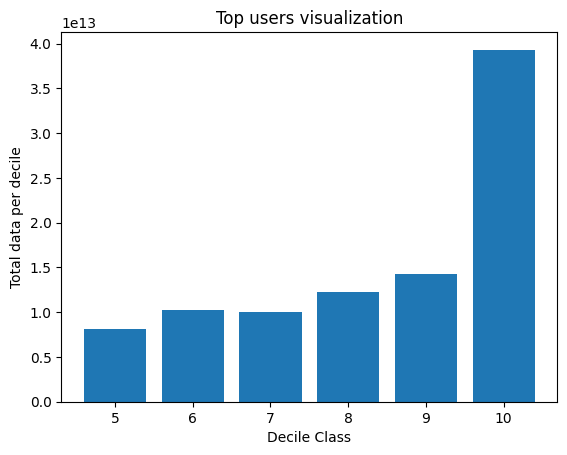

In [22]:
import matplotlib.pyplot as plt
plt.bar(segmented_data['decile_class'],segmented_data['total_data_per_decile'])
plt.xlabel('Decile Class')
plt.ylabel('Total data per decile')
plt.title('Top users visualization')
plt.show()

Now let's conduct Non-graphical Univariate analysis and see the interpretation

In [24]:
from scripts.aggregation import Non_graphical_univariate_analysis
dispersed_data =  Non_graphical_univariate_analysis(data)

ImportError: cannot import name 'Non_graphical_univariate_analysis' from 'scripts.aggregation' (c:\users\hp\desktop\tutorial\kaim-week-2\scripts\aggregation.py)